In [2]:
import numpy as np
import pandas as pd
from brian2 import *   
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ewa/Desktop/magisterka/MEAanalysis/.venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:15: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/ewa/Desktop/magisterka/MEAanalysis/.venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


In [3]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [4]:
path = "../data/spike_generated.csv"

df = pd.read_csv(path)

In [5]:
df = df.iloc[:, 1:]

In [6]:
df.shape

(1800000, 51)

1. Scatter plot całości 
2. Scatter plot dwóch pojedynczych kanałów
3. Barplot ilość spików na kanał
4. Firing rate dla każdego neuronu
5. Dużo o ISI
6. Fano factor
7. Autokorelacja

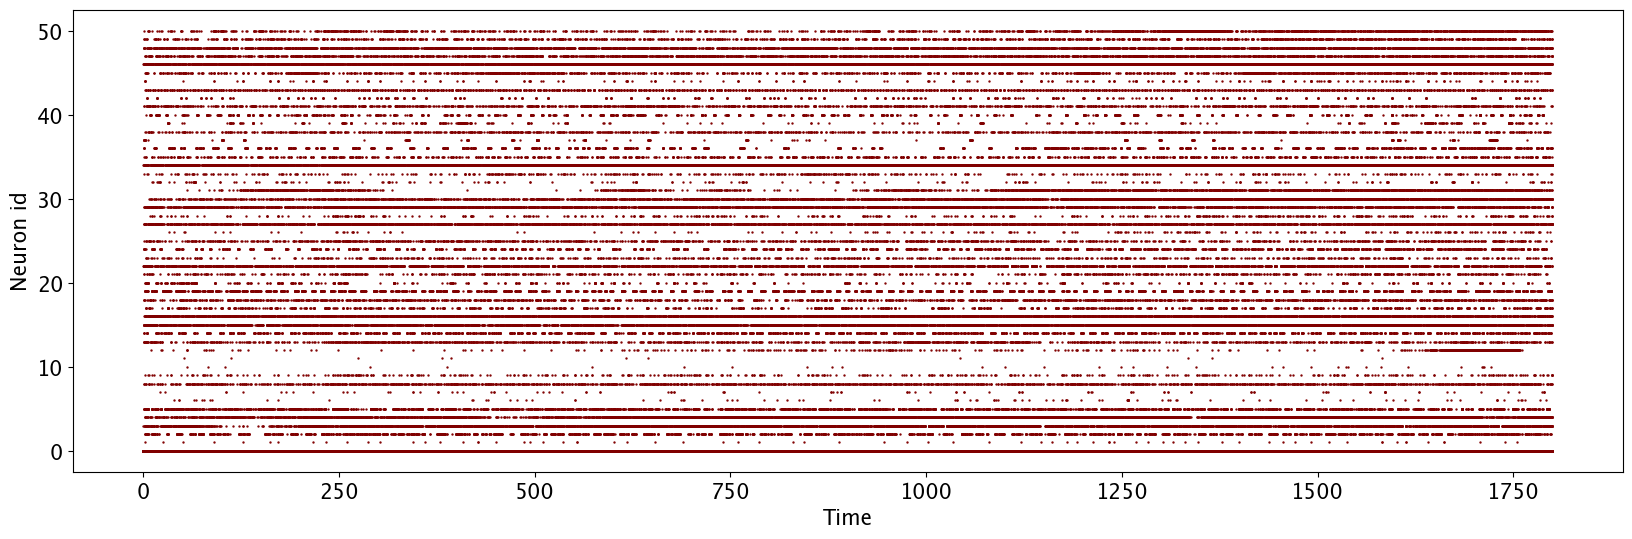

In [7]:
spike_times, neuron_idx = df.to_numpy().nonzero()
plt.figure(figsize=(20, 6))
plt.scatter(spike_times / 1000, neuron_idx, s=0.5, color='maroon') 
plt.xlabel('Time', fontsize=15)
plt.ylabel('Neuron id', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15) 
plt.show()

In [8]:
df.shape[1]

51

In [9]:
sum_spikes = []
for i in range(df.shape[1]):
    sum_spikes.append(sum(df.iloc[:, i]))

In [10]:
sum_spikes = sum_spikes[1:]

In [11]:
max(sum_spikes), min(sum_spikes)

(675193, 11)

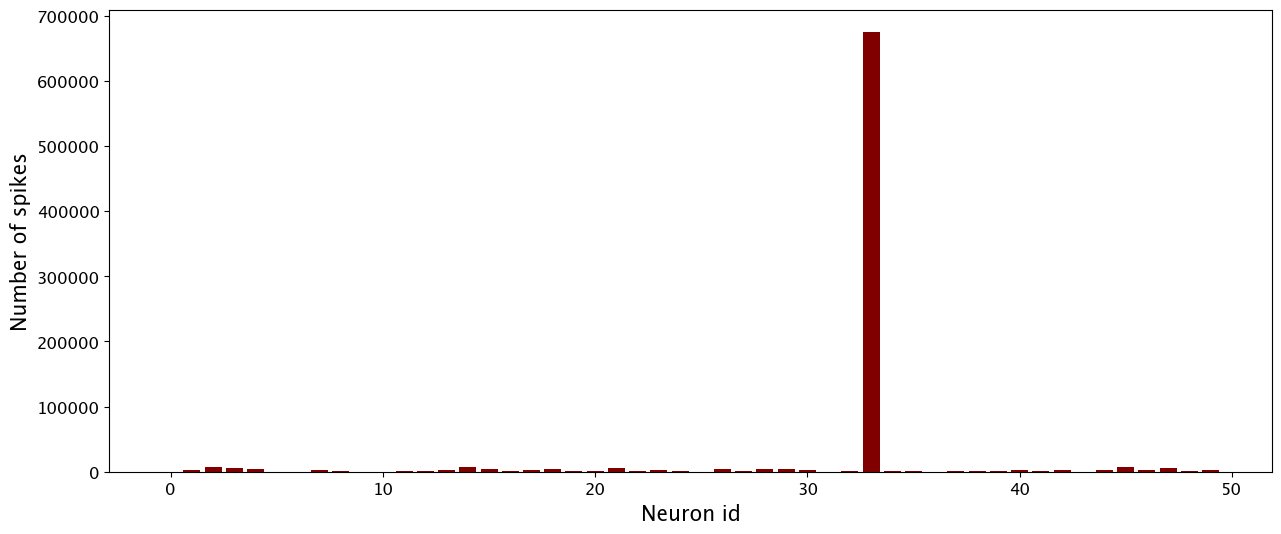

In [12]:
plt.figure(figsize=(15, 6))
plt.bar(range(df.shape[1] - 1), sum_spikes, color='maroon') 
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Number of spikes', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()

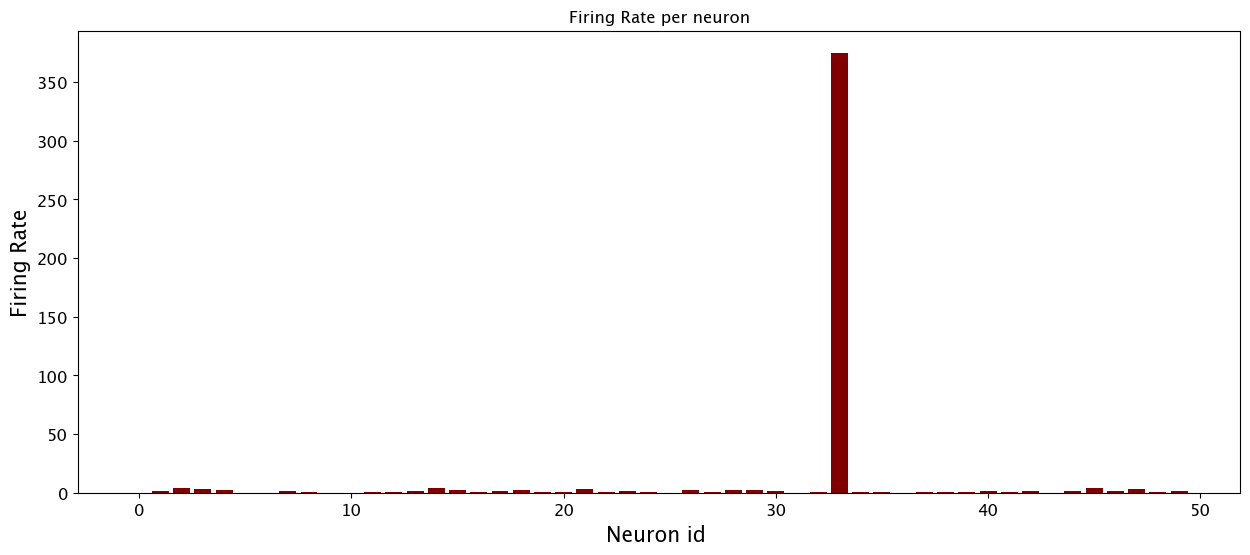

In [13]:
duration = 1800
firing_rates = [spike_count / duration for spike_count in sum_spikes]  # Firing rate 

plt.figure(figsize=(15, 6))
plt.bar(range(df.shape[1] - 1), firing_rates, color='maroon') 
plt.title('Firing Rate per neuron')
plt.xlabel('Neuron id ', fontsize=15)
plt.ylabel('Firing Rate', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()

In [14]:
print(f" Mean firing rate: {mean(firing_rates)}")
print(f" Median firing rate: {median(firing_rates)}")
print(f" Standard deviation firing rate: {std(firing_rates)}")

 Mean firing rate: 8.714577777777778
 Median firing rate: 0.98
 Standard deviation firing rate: 52.35401489828527


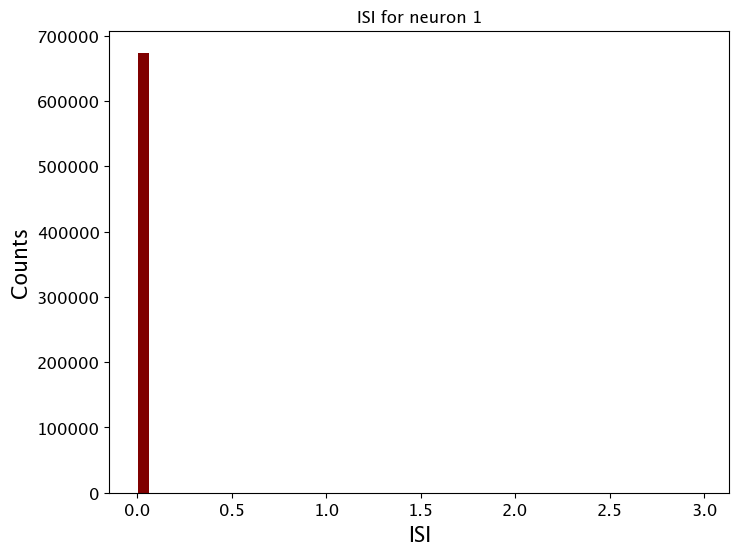

In [17]:
neuron_spikes = df.iloc[:, 34].to_numpy()
times = df.iloc[:, 0].to_numpy() 
spike_times = times[neuron_spikes == 1]
isi = np.diff(spike_times)

plt.figure(figsize=(8, 6))
plt.hist(isi, bins=50, color='maroon') 
plt.title('ISI for neuron 1')
plt.xlabel('ISI', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()

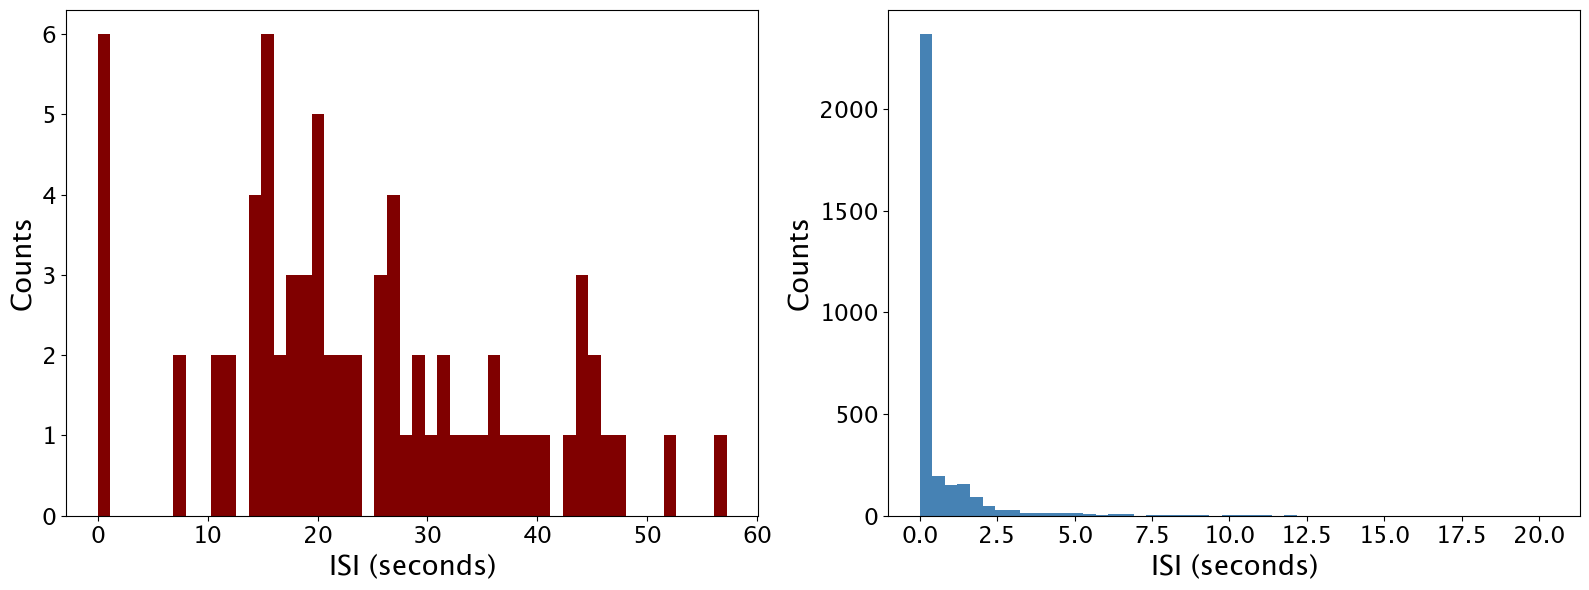

In [1032]:
neuron1_spikes = df.iloc[:, 1].to_numpy()
times = df.iloc[:, 0].to_numpy()
spike_times1 = times[neuron1_spikes == 1]
isi1 = np.diff(spike_times1)

#2
neuron2_spikes = df.iloc[:, 2].to_numpy()
spike_times2 = times[neuron2_spikes == 1]
isi2 = np.diff(spike_times2)


plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(isi1, bins=50, color='maroon')
#plt.title('ISI for neuron 1', fontsize=15)
plt.xlabel('ISI (seconds)', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=17)

plt.subplot(1, 2, 2)
plt.hist(isi2, bins=50, color='steelblue')
#plt.title('ISI for neuron 2', fontsize=20)
plt.xlabel('ISI (seconds)', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=17)

plt.tight_layout()
plt.show()


In [1033]:
isi

array([2.2590e+01, 2.6261e+01, 3.9387e+01, 3.6943e+01, 3.4180e+01,
       1.0452e+01, 4.4706e+01, 1.6702e+01, 2.6763e+01, 2.6640e+01,
       1.5081e+01, 4.2900e+01, 1.4395e+01, 1.8981e+01, 2.9672e+01,
       1.9296e+01, 6.0000e-03, 2.2545e+01, 3.6441e+01, 7.6160e+00,
       1.6773e+01, 2.5357e+01, 1.8178e+01, 5.0000e-03, 4.7257e+01,
       1.6003e+01, 3.6264e+01, 3.5124e+01, 5.1965e+01, 1.8234e+01,
       2.6998e+01, 4.4112e+01, 1.3894e+01, 4.4495e+01, 5.7205e+01,
       3.0177e+01, 2.6790e+01, 3.1956e+01, 4.5375e+01, 4.0567e+01,
       2.5392e+01, 1.4740e+01, 1.9634e+01, 1.1991e+01, 2.1289e+01,
       1.9561e+01, 6.0000e-03, 7.0780e+00, 2.8134e+01, 1.4259e+01,
       2.0043e+01, 1.2499e+01, 1.5925e+01, 1.5925e+01, 3.1270e+01,
       2.1685e+01, 3.7983e+01, 1.7609e+01, 1.5056e+01, 2.0212e+01,
       2.3891e+01, 2.3201e+01, 4.4573e+01, 6.0000e-03, 1.9345e+01,
       1.0424e+01, 5.0000e-03, 2.8829e+01, 1.9656e+01, 1.1700e-01,
       4.5895e+01, 3.2316e+01, 1.5064e+01])

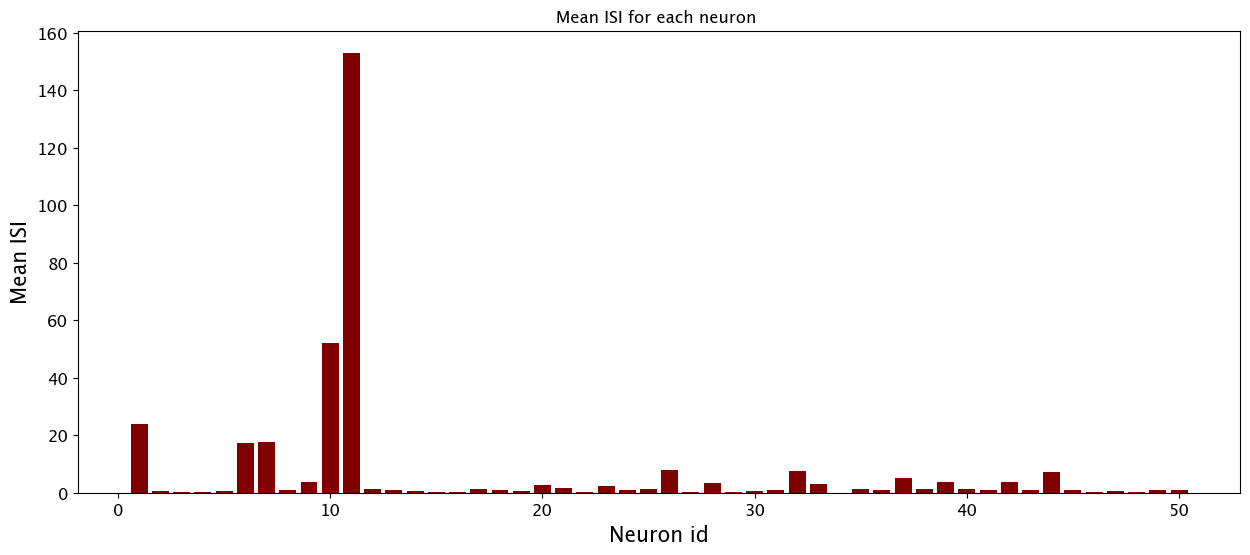

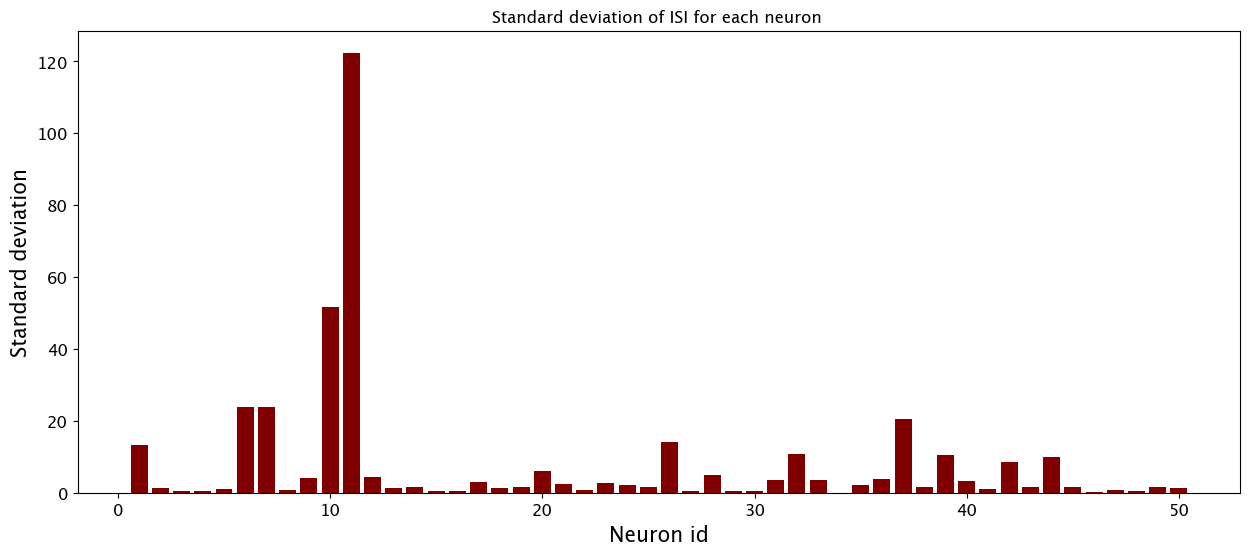

In [1034]:
mean_isi_list = []
std_isi_list = []
for i in range(1, df.shape[1]): 
    neuron_spikes = df.iloc[:, i].to_numpy()

    times = df.iloc[:, 0].to_numpy()

    spike_times = times[neuron_spikes == 1]
    
    if len(spike_times) > 1:  
        isi = np.diff(spike_times)
        mean_isi = np.mean(isi) 
        mean_isi_list.append(mean_isi)  
        std_isi = np.std(isi) 
        std_isi_list.append(std_isi)
    else:
        mean_isi_list.append(np.nan) 
        std_isi_list.append(np.nan)

plt.figure(figsize=(15, 6))
plt.bar(range(1, df.shape[1]), mean_isi_list, color='maroon') 
plt.title('Mean ISI for each neuron ')
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Mean ISI', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()

plt.figure(figsize=(15, 6))
plt.bar(range(1, df.shape[1]), std_isi_list, color='maroon') 
plt.title('Standard deviation of ISI for each neuron ')
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Standard deviation', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()


In [1035]:
print(f" Mean ISI: {mean(mean_isi_list)}")
print(f" Median ISI: {median(mean_isi_list)}")
print(f" Standard deviation of ISI: {std(mean_isi_list)}")

 Mean ISI: 6.805327802372092
 Median ISI: 1.0210876247601386
 Standard deviation of ISI: 22.496749651789425


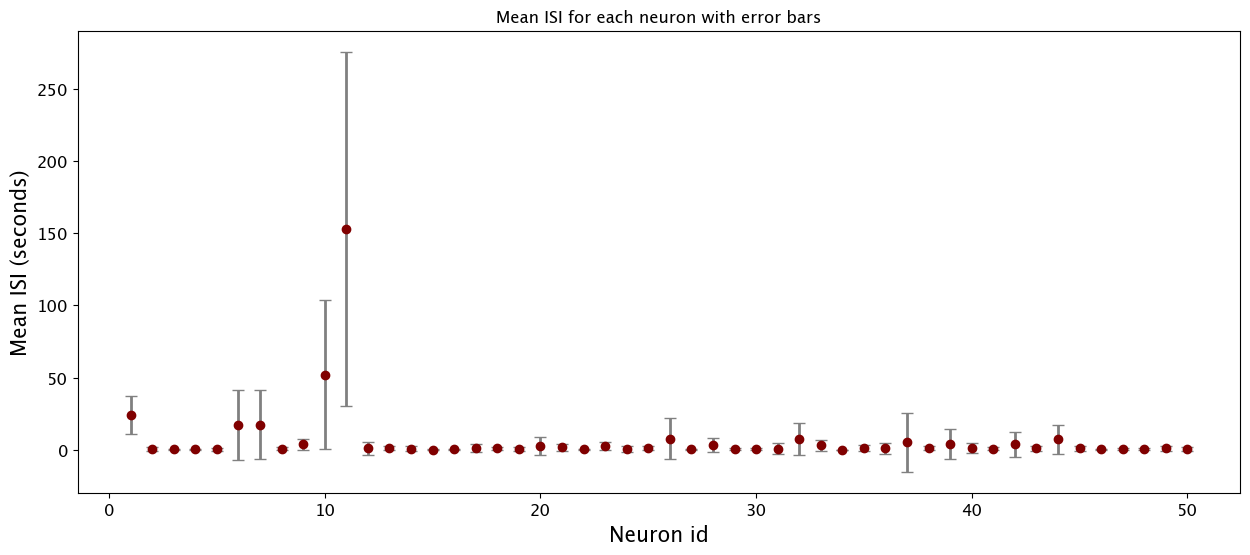

In [32]:
mean_isi_list = []
std_isi_list = []

for i in range(1, df.shape[1]): 
    neuron_spikes = df.iloc[:, i].to_numpy()
    times = df.iloc[:, 0].to_numpy()

    spike_times = times[neuron_spikes == 1]
    
    if len(spike_times) > 1:  
        isi = np.diff(spike_times)
        mean_isi = np.mean(isi) 
        mean_isi_list.append(mean_isi)  
        std_isi = np.std(isi) 
        std_isi_list.append(std_isi)
    else:
        mean_isi_list.append(np.nan) 
        std_isi_list.append(np.nan)

plt.figure(figsize=(15, 6))
plt.errorbar(range(1, df.shape[1]), mean_isi_list, yerr=std_isi_list, fmt='o', color='maroon', 
             ecolor='gray', elinewidth=2, capsize=4)  # Punkty z błędami
plt.title('Mean ISI for each neuron with error bars')
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Mean ISI (seconds)', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.show()


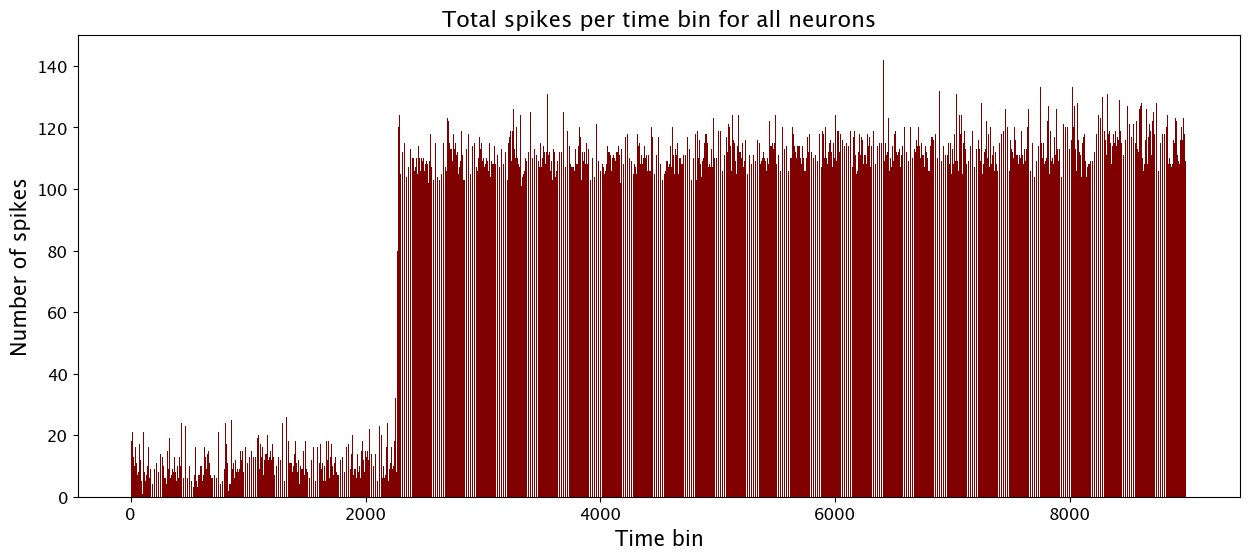

In [1036]:
spikes = df.iloc[:, 1:].to_numpy() 

bin_size = 200 
num_bins = spikes.shape[0] // bin_size

binned_spikes_total = spikes[:num_bins*bin_size].reshape(num_bins, bin_size, -1).sum(axis=(1,2))

plt.figure(figsize=(15, 6))
plt.bar(range(num_bins), binned_spikes_total, color = 'maroon')
plt.xlabel('Time bin', fontsize=15)
plt.ylabel('Number of spikes', fontsize=15)
plt.title('Total spikes per time bin for all neurons', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

Population Fano (bin_size=200 samples): 22.375


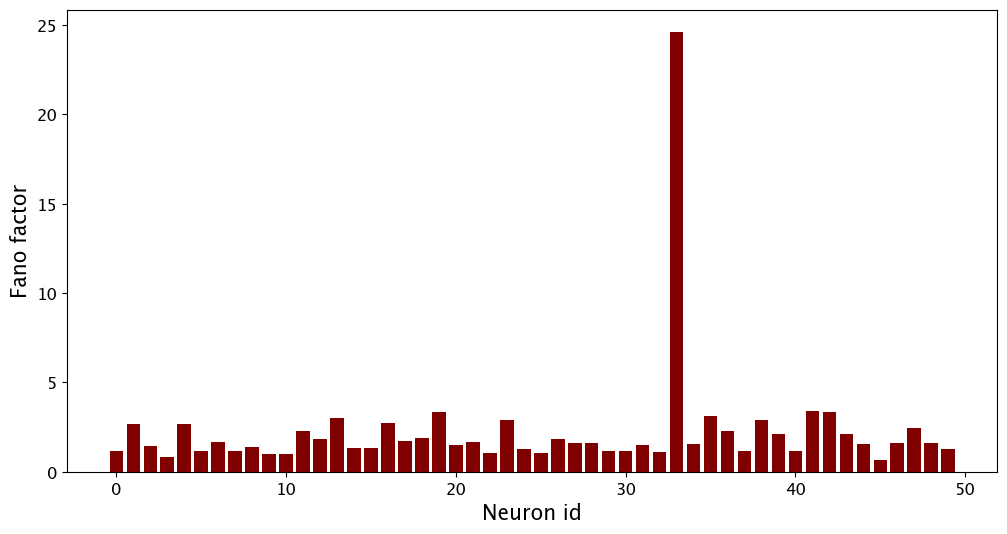

In [20]:
spikes = df.iloc[:, 1:].to_numpy()       
bin_size = 20                  
num_bins = spikes.shape[0] // bin_size
B = spikes[:num_bins*bin_size].reshape(num_bins, bin_size, -1)
counts = B.sum(axis=1)                  

mu  = counts.mean(axis=0)
var = counts.var(axis=0, ddof=1)         
ff_neuron = np.where(mu > 0, var/mu, np.nan)

pop_counts = counts.sum(axis=1)     
pop_ff = pop_counts.var(ddof=1) / pop_counts.mean()
print(f"Population Fano (bin_size={bin_size} samples): {pop_ff:.3f}")

plt.figure(figsize=(12, 6))
plt.bar(range(len(ff_neuron)), ff_neuron, color='maroon')
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('Fano factor', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


In [1038]:
min(ff_neuron), max(ff_neuron)

(np.float64(0.9353911236154376), np.float64(2.4675790451865587))

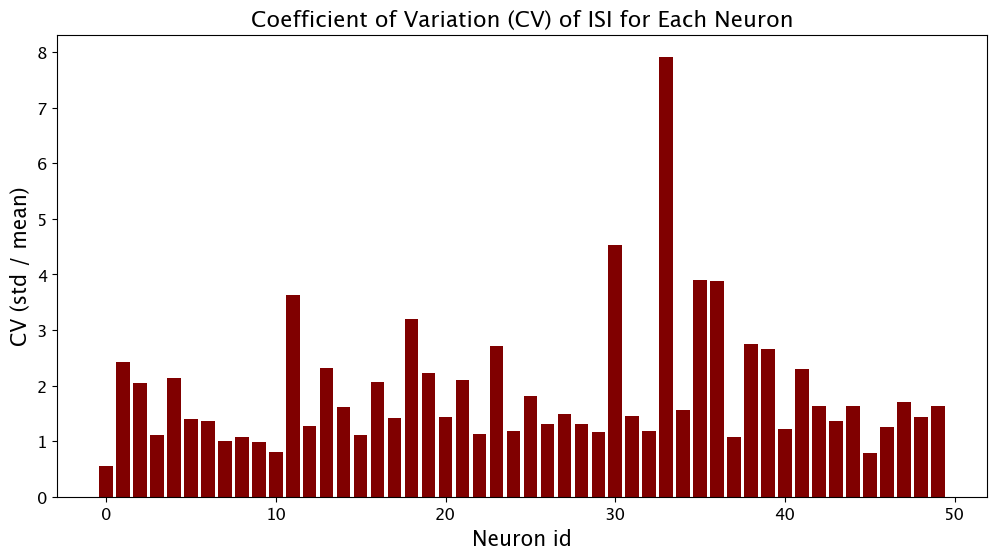

Mean CV across neurons: 1.91
Median CV across neurons: 1.46


In [1039]:
num_neurons = df.shape[1] - 1  
isi_all_neurons = []
cv_all_neurons = []

for n in range(1, df.shape[1]): 
    spike_times = df.iloc[:, 0].to_numpy()[df.iloc[:, n] == 1]  
    if len(spike_times) > 1: 
        isi = np.diff(spike_times)
        isi_all_neurons.append(isi)
        cv_all_neurons.append(np.std(isi) / np.mean(isi)) 
    else:
        isi_all_neurons.append(np.array([]))
        cv_all_neurons.append(np.nan)

isi_all_flat = np.concatenate([isi for isi in isi_all_neurons if len(isi) > 0])

plt.figure(figsize=(12, 6))
plt.bar(range(num_neurons), cv_all_neurons, color='maroon')
plt.title('Coefficient of Variation (CV) of ISI for Each Neuron', fontsize=16)
plt.xlabel('Neuron id', fontsize=15)
plt.ylabel('CV (std / mean)', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

print(f"Mean CV across neurons: {np.nanmean(cv_all_neurons):.2f}")
print(f"Median CV across neurons: {np.nanmedian(cv_all_neurons):.2f}")


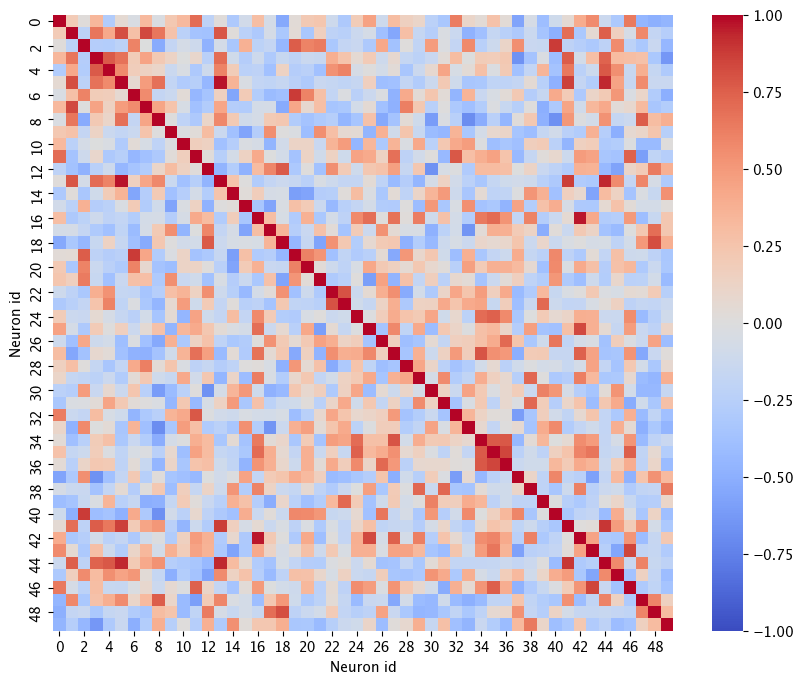

In [1040]:
neurons = df.shape[1]-1
times = df.iloc[:, 0].to_numpy()

ISI_list = []
for i in range(neurons):
    spikes = df.iloc[:, i+1].to_numpy()
    spike_times = times[spikes == 1]
    isi = np.diff(spike_times)
    ISI_list.append(isi)

#dopasowujemy długość wszystkich ISI do najkrótszego neuronu
min_len = min(len(isi) for isi in ISI_list)
ISI_matrix = np.array([isi[:min_len] for isi in ISI_list])

corr_matrix = np.corrcoef(ISI_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.xlabel('Neuron id')
plt.ylabel('Neuron id')
plt.show()


In [23]:
binned

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])